# Analysis of The Prison Break Helicopter Escapes

### Background 
There have been multiple prison escapes where an inmate escapes by means of a helicopter. One of the earliest instances was the escape of Joel David Kaplan, nicknamed "Man Fan", in August 19, 1971, from the Santa Martha Acatitla in Mexico.<br>

**The following questions are to be answered**<br>
1: In which year did the most helicopter prison break attempts occur?<br>
2: In which countries do the most attempted helicopter prison breaks occur?<br>
3: In which countries do helicopter prison breaks have a higher chance of success?<br>
4: How does the number of escapees affect the success?<br>
5: Which escapees have done it more than once?<br>

To answer the above questions, data from this [Wikipedia page](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) was scraped and analyzed. It covers the details of attempted helicopter prison escapes for a period of 49 years (1971-2020).


**Data dictionary**
The dataset contains six data fields:<br>

1- Date: the date of the attempted prison break<br>
2- Prison name: the name of the prison<br>
3- Country: where it the prison break happened<br>
4- Status: Whether the attempt was successful or not<br>
5- Names: of the escapees<br>
6- More details: other details of the prison break<br>

## Importing the helper function

In [56]:
# import the needed helper function
from helper import *

## Get the needed dataset

In [57]:
# get the needed data from the data source
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

## Print the first three rows

In [58]:
# Loop through the data to print the first 3 records
for row in data:
    print(row[:3])

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico']
['October 31, 1973', 'Mountjoy Jail', 'Ireland']
['May 24, 1978', 'United States Penitentiary, Marion', 'United States']
['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France']
['May 7, 1981', 'Orsainville Prison, Quebec City', 'Canada']
['January, 1983', 'Pentridge (HM Prison)', 'Australia']
['December 19, 1985', 'Perry Correctional Institution, Pelzer, South Carolina', 'United States']
['December 31, 1985', 'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro', 'Brazil']
['May 26, 1986', 'Prison de la Santé', 'France']
['November 5, 1986', 'Federal Correctional Institution, Dublin', 'United States']
['November 23, 1986', 'Prigione di Rebibbia, Roma', 'Italy']
['December 10, 1987', 'Gartree (HM Prison)', 'United Kingdom']
['July 11, 1988', 'Penitentiary of New Mexico', 'United States']
['April 17, 1989', 'Federal Holding Facility, Miami, FL', 'United States']
['August 19, 1989', 'Arkansas Valley Correctional

## Removing the details column

Initialize an index variable with the value of 0. The purpose of this variable is to help track which row is beign modifying.

In [59]:
# Remove the details Column as it is not needed in the analysis 
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [60]:
print(row[:3])

['September 25, 2020', 'Forest prison, Brussels', 'Belgium']


### Extracting the Year
In the code cell below, we iterate over data using the iterable variable row:

* With every occurrence of `row[0]`, we refer to the first entry of `row`, i.e., the date.
* Thus, with `date = fetch_year(row[0])`, we're extracting the year out of the date in `row[0]` and assiging it to the variable `date`.
* We then replace the value of `row[0]` with the year that we just extracted.

In [61]:
# Since we don’t  need the month and day, thus, extract the year
for row in data:
    (row[0]) = fetch_year(row[0])

In [62]:
# Print to confirm that the year has been extracted
print(row)

[2020, 'Forest prison, Brussels', 'Belgium', 'No', 'Kristel A.']


### Number of attempted prison break per year

In [63]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

Check the earliest and latest dates in dataset.

In [64]:
print(min_year) # the minimum year
print(max_year)  # the maximum year

1971
2020


Now we'll create a list of all the years ranging from min_year to max_year. Our goal is to then determine how many prison break attempts were there for each year. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure we capture them.

In [65]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

Check the `years` to see if it gives what we want

In [66]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


The years look as expected 

Now create a list where each element looks like `[<year>, 0]`.

In [67]:
attempts_per_year = []
for y in years:
    attempts_per_year.append([y, 0])

In [68]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
            
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


### Visualize the number of attempts per year

In [69]:
%matplotlib inline

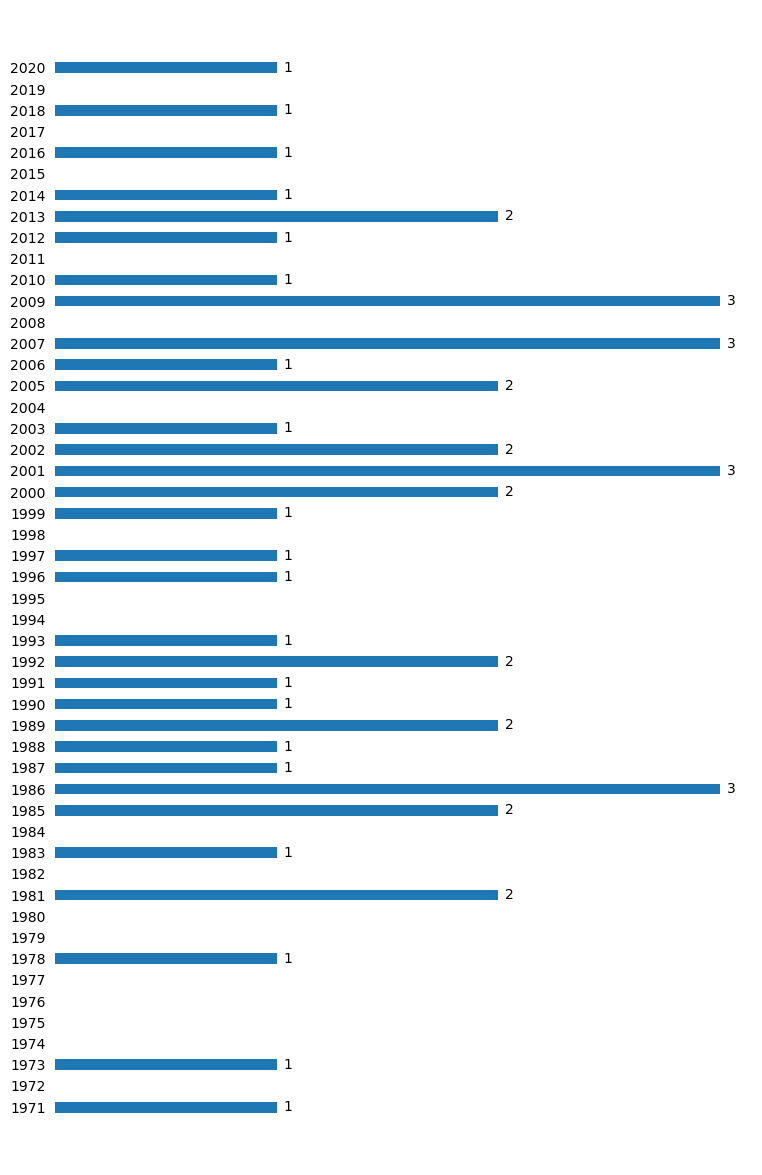

In [70]:

barplot(attempts_per_year)

The years in which the most helicopter prison break attempts occurred were 1986, 2001, 2007 and 2009, with a total of three attempts each.

In [71]:
frequency_by_countries = df["Country"].value_counts()
print_pretty_table(frequency_by_countries)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


### Visualize the number of occurence of attempted helicopter prison escapes per country

<AxesSubplot:title={'center':'Prison Breaks by Country'}>

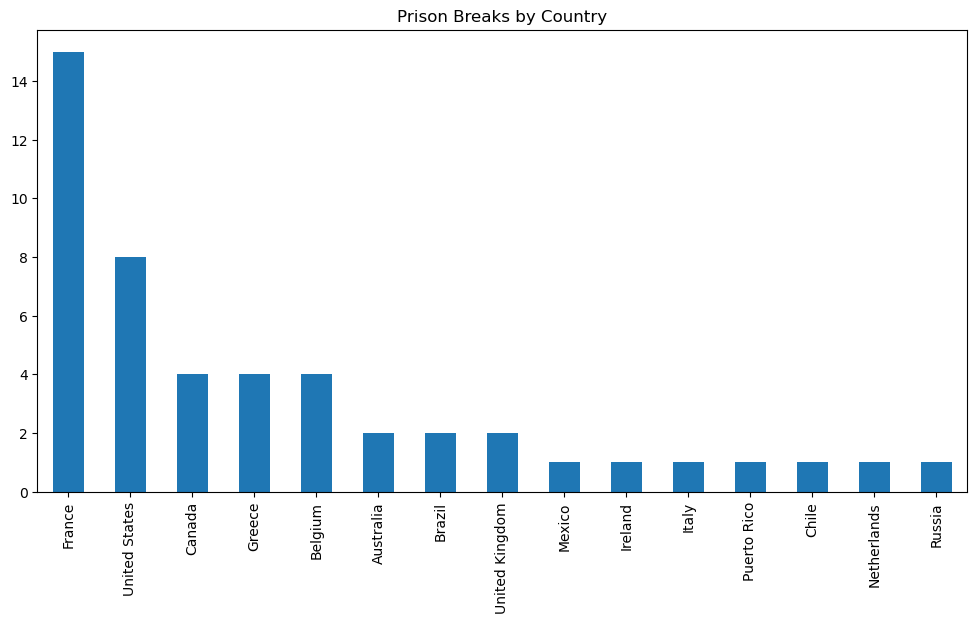

In [72]:
df['Country'].value_counts().plot(kind='bar' , x = 'Country',y = 'No. of Escapes',title = 'Prison Breaks by Country',figsize = (12,6))

France has the highest number attempted helicopter prison escapes, follow by United States

### Number of successful and unsuccessful  attempts of helicopter prision escapes 

In [73]:
# Counting the number of successful and failed attempts
success_count = df.pivot_table(index ="Succeeded", values = "Country", aggfunc = "count")

success_count.columns = ["Counts"]
success_count.sort_index(inplace = True, ascending = False)
success_count.reset_index()

,Succeeded,Counts
0,Yes,34
1,No,14


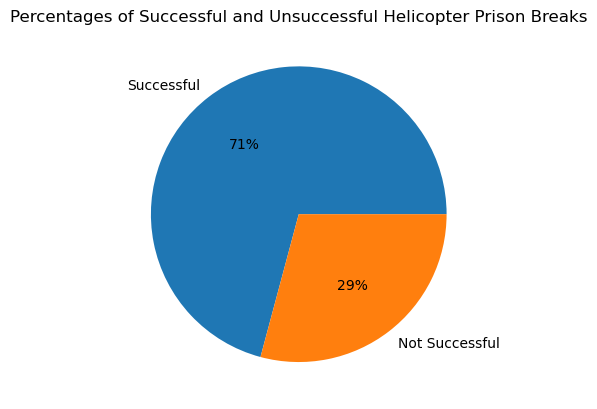

In [74]:
plt.pie(data =success_count, x ="Counts", labels = ("Successful", "Not Successful"), autopct='%1.f%%')
plt.title("Percentages of Successful and Unsuccessful Helicopter Prison Breaks");

As depicted in the chart above, 71% (34) of the helicopter prison breaks recorded to be successful and the prisoners were able to escape with the helicopter, while 29% were recorded to be unsuccessful.

## Key Insights
**This project analysed the data of helicopter prison escapes from the year 1971 - 2020.**<br>
1: It can be deduced that the year 1986, 2001, 2007 and 2009 has the highest number of helicopter prison escapes with a total of three attempts each.<br>
2: France has the highest number attempted helicopter prison escapes with 15 attempts, follow by United States with 8 attempts<br>
3: The helicopter prison breaks have a higher chance of success in France<br> 
4: 71% (34) of the helicopter prison breaks recorded to be successful and the prisoners were able to escape with the helicopter, while 29% were recorded to be unsuccessful.<br>

